In [2]:
from segysak.segy import segy_loader
import pathlib
import platform
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyvista as pv
import geopandas as gpd

from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead


C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\gemgis9\lib\site-packages\segysak\segy\_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
segy_file = pathlib.Path("H:/McArthur/L210_Processed_Seismic_Package/17GA-SN1_SEGY_Data/PoSTM_17gasn1_6s.sgy")
print("SEG-Y exists:", segy_file.exists())


SEG-Y exists: True


In [9]:
get_segy_texthead(segy_file)

Text HeaderC01 CLIENT:GEOSCIENCE AUSTRALIA  SURVEY NO:L210
C02 SURVEY NAME:SOUTH NICHOLSON 2D QLD/NT
C03 LINENAME: 17GA-SN1   DATE RECORDED: 2 Jul to 22 Jul 2017
C04 DATASET: POSTM (POST-STACK TIME MIGRATION) STACK
C05 CDP RANGE:2000-38674; RECORD LENGTH: 6000 MS
C06 SAMPLE RATE: 4 MS; NUMBER OF SAMPLES PER TRACE: 1501
C07 ------------------RECORDING PARAMETERS-------------------------------
C08 ACQUIRED BY: TERREX SEISMIC(CREW A1)FOR GEOSCIENCE AUSTRALIA;
C09 FIELD INSTRUMENT: Sercel 428XL; FIELD FILTER: 0.8 NYQUIST LINEAR PHASE;
C10 PRE-AMP GAIN: 12db/400 mv; CORRELATION: AFTER STACK;
C11 VIBRATOR: AHV IV PLS-364; VIB CONTROL: VE 464; SWEEP LENGTH: 1x24 SEC;
C12 MONO SWEEP: 4-96 HERTZ; 0.3 S  START and END TAPERS;
C13 VIB ARRAY:3 VIBs CENTRED ON HALF STATION;1xSTANDING SWEEP;75% FORCE;
C14 SPREAD PATTERN:-5990M...-10M*10M...5990M(CH1...CH300*CH301....CH600);
C15 ACTIVE SPREAD: 600 CHANNELS SYMMETRICAL SPLIT; FOLD: 150;
C16 GEOPHONE ARRAY:6 X SENSOR SM24 OVER 16.67M;
C17 3.3m BETWEEN GEOPHONES CENTRED ON PEG;STATION INTERVAL:20M;VP INTERVAL:40m;
C18 FFID: 18937-38140; SHOT STATIONS: 1000-19724; RECEIVER STATIONS:
1000-19725;C19 ------------------PROCESSING
HISTORY--------------------------------------- C20 (1)REFORMAT FROM SEG-D TO
INTERNAL FORMAT;(2)TRACE EDIT;                    C21 (3)MERGE GEOMETRY
DATABASE;(4)REFRACTION STATICS APPLICATION;               C22 (5)CORRECTION TO
FLOATING DATUM;(6)MINIMUM PHASE CONVERSION;                C23 (7)NOISE
ATTENUATION(SHOT AND RECEIVER DOMAIN);(8)SCAC;                     C24 (9)SECOND
PASS NOISE ATTENUATION;(10)DECONVOLUTION;                         C25
(11)BANDPASS FILTER:4/6-85/90 HZ;(12)VA01 & RESIDUAL STATICS PASS1;         C26
(13))VA02 & RESIDUAL STATICS PASS2;(14)AGC 500 MS;                          C27
(15)NMO VA03; (16)FINAL MUTE; (17)STACK;                                    C28
(18)KIRCHHOFF POST-STACK TIME MIGRATION;                                    C29
(19)CADZOW FILTER AND TVF; (20)SHIFT TO FINAL DATUM;                        C30
(21)OUTPUT TO SEG-Y; (22)RESAMP 4 MS, 6 S; (23)TRACE BALANCE                C31
(24)COHERENCY ENHANCEMENT (DIGISTACK 0.5); (25)TSCALE AGC 2500 MS.          C32
SURVEY DATUM:GDA94;MGA ZONE 53;FIRST SEISMIC SAMPLE AT 350M AMSL+200MS;     C33
-200MS BULK SHIFT WILL PLACE DATA 0 MS AT 350M AMSL                         C34
FINAL DATUM(SRD):350M AMSL;REPLACEMENT VELOCITY:5200M/S;                    C35
CDP:21-24;INT              CDP-FOLD:33-34;INT         RDATUM:53-56;INT      C36
SDATUM:57-60;INT           CDP-X:73-76and181-184;INT  CDP-Y:77-80and185-188;C37
WVEL:91-92;INT             SUBWVEL:93-94;INT          CDP-STAT:191-194;INT  C38
AIRMAG:199-202;IBMFL       GRAVITY:203-206;IBMFL      CDP-ELEV:211-212;INT  C39
RFR-ELEV:217-218;INT       RFR-VEL:219-220;INT        CDP-AVG:225-226;INT   C40
PROCESSED BY DOWNUNDER GEOSOLUTIONS PERTH AUSTRALIA 2018

In [12]:
    
scan = segy_header_scan(segy_file, max_traces_scan=2000)
with pd.option_context("display.max_rows", 100):
    display(scan)



  0%|          | 0.00/2.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,1.000500e+03,5.774946e+02,1.000000e+00,5.007500e+02,1000.5,1.500250e+03,2.000000e+03
TRACE_SEQUENCE_FILE,5,2000.0,1.000500e+03,5.774946e+02,1.000000e+00,5.007500e+02,1000.5,1.500250e+03,2.000000e+03
FieldRecord,9,2000.0,-9.999000e+03,0.000000e+00,-9.999000e+03,-9.999000e+03,-9999.0,-9.999000e+03,-9.999000e+03
TraceNumber,13,2000.0,-9.999000e+03,0.000000e+00,-9.999000e+03,-9.999000e+03,-9999.0,-9.999000e+03,-9.999000e+03
EnergySourcePoint,17,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00
CDP,21,2000.0,2.999500e+03,5.774946e+02,2.000000e+03,2.499750e+03,2999.5,3.499250e+03,3.999000e+03
CDP_TRACE,25,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00
TraceIdentificationCode,29,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00
NSummedTraces,31,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00
NStackedTraces,33,2000.0,1.474085e+02,3.325827e+01,3.000000e+00,1.520000e+02,156.0,1.620000e+02,1.820000e+02


In [13]:
trace_headers = segy_header_scrape(segy_file)
trace_headers

  0%|          | 0.00/36.7k [00:00<?, ? traces/s]

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,1,-9999,-9999,1,2000,1,1,1,5,...,0,203,0,200,192,247267328,0,2097152,0,0
1,2,2,-9999,-9999,1,2001,1,1,1,3,...,0,203,0,200,191,248446976,0,1769472,0,0
2,3,3,-9999,-9999,1,2002,1,1,1,4,...,0,203,0,200,190,249626624,0,1703936,0,0
3,4,4,-9999,-9999,1,2003,1,1,1,5,...,0,204,0,200,187,249757696,0,1703936,0,0
4,5,5,-9999,-9999,1,2004,1,1,1,4,...,0,204,0,200,181,250085376,0,1638400,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36670,36671,36671,-9999,-9999,1,38670,1,1,1,3,...,0,226,0,200,215,139919360,0,-983040,0,0
36671,36672,36672,-9999,-9999,1,38671,1,1,1,2,...,0,226,0,200,209,139919360,0,-1048576,0,0
36672,36673,36673,-9999,-9999,1,38672,1,1,1,2,...,0,226,0,200,203,139853824,0,-1179648,0,0
36673,36674,36674,-9999,-9999,1,38673,1,1,1,1,...,0,226,0,200,198,139853824,0,-1376256,0,0


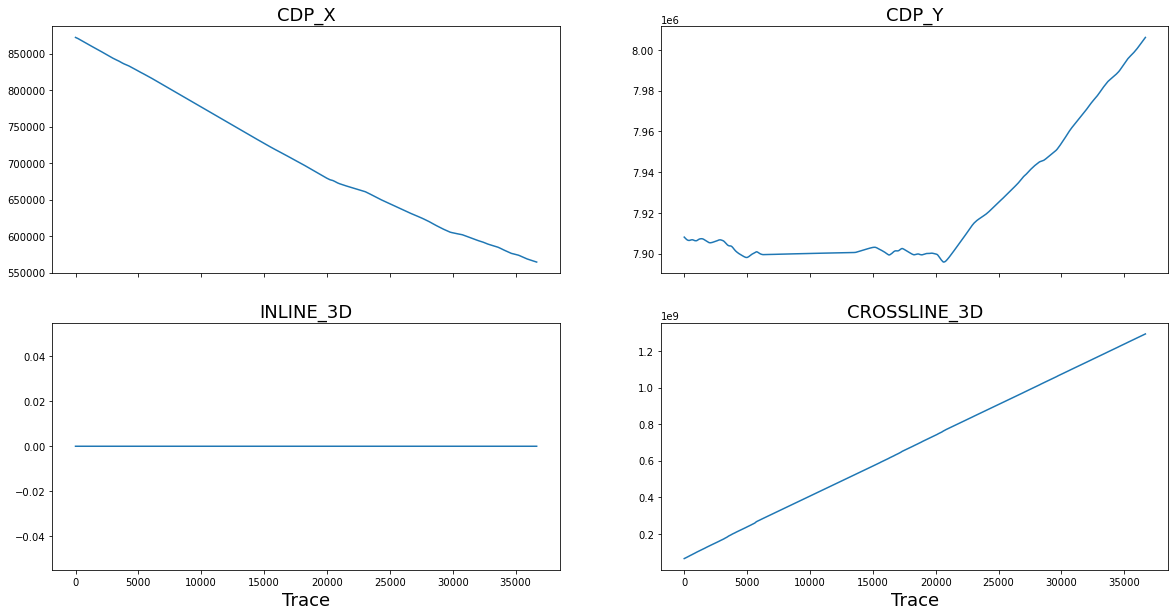

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharex=True)

for ax, prop in zip(axs.ravel(), ["CDP_X", "CDP_Y", "INLINE_3D", "CROSSLINE_3D"]):
    ax.plot(trace_headers[prop])
    ax.set_title(prop, fontdict={"fontsize":18})

for ax in axs[1, :]:
    ax.set_xlabel("Trace", fontdict={"fontsize":18})

In [15]:
seisnc_vol = segy_loader(segy_file)

  0%|          | 0.00/36.7k [00:00<?, ? traces/s]

                               byte_loc    count          mean           std  \
TRACE_SEQUENCE_LINE                   1  36675.0  1.833800e+04  1.058730e+04   
TRACE_SEQUENCE_FILE                   5  36675.0  1.833800e+04  1.058730e+04   
CDP                                  21  36675.0  2.033700e+04  1.058730e+04   
NStackedTraces                       33  36675.0  1.519346e+02  1.413884e+01   
offset                               37  36675.0  2.164327e+01  2.147800e+01   
ReceiverGroupElevation               41  36675.0 -9.998928e+03  2.591405e-01   
SourceSurfaceElevation               45  36675.0 -9.998928e+03  2.591405e-01   
SourceWaterDepth                     61  36675.0 -2.032845e+02  4.019880e+03   
GroupWaterDepth                      65  36675.0 -9.758399e+01  4.040855e+03   
SourceX                              73  36675.0  7.054745e+05  9.105155e+04   
SourceY                              77  36675.0  7.922321e+06  3.138119e+04   
GroupX                               81 

Converting SEGY:   0%|          | 0.00/36.7k [00:00<?, ? traces/s]

In [63]:
print(seisnc_vol.seis.is_2d())
print(seisnc_vol.seis.is_twt())
print(seisnc_vol.seis.is_depth())
print(seisnc_vol.seis.get_measurement_system())

True
True
False
m


In [66]:
seisnc_vol.seis.get_affine_transform()

ValueError: 

In [16]:
print(seisnc_vol)

<xarray.Dataset>
Dimensions:  (cdp: 36675, twt: 1501)
Coordinates:
  * cdp      (cdp) int64 0 1 2 3 4 5 6 ... 36669 36670 36671 36672 36673 36674
  * twt      (twt) float64 0.0 4.0 8.0 12.0 ... 5.992e+03 5.996e+03 6e+03
Data variables:
    data     (cdp, twt) float32 0.0 0.0 0.0 0.0 ... -2.285 -2.126 -1.161 0.2289
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT:GEOSCIENCE AUSTRALIA  SURVEY NO:L210\nC02...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         PoSTM_17gasn1_6s.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-4.25206147838982, -3.951590304677614, -1.522488523...
    coord_scalar:        1.0


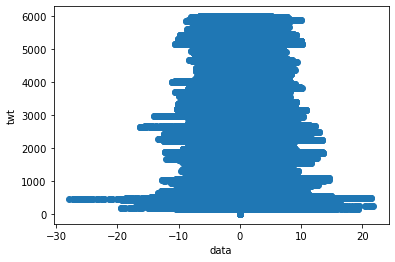

In [35]:
#_ = seisnc_vol.sel(iline=10100).data.T.plot(yincrease=False, figsize=(20, 10), vmax=10)
seisnc_vol.plot.scatter(y='twt',x='data')

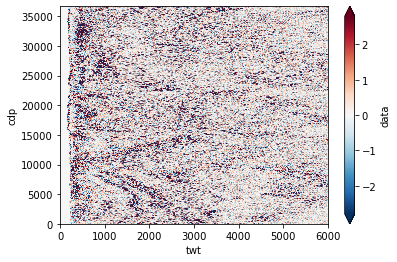

In [42]:
seisnc_vol.data.plot(robust="True",cmap="seismic")

In [41]:
seisnc_vol.mean(dim=('cdp','twt'))

<xarray.Dataset>
Dimensions:  ()
Data variables:
    data     float32 2.368e-06

In [58]:
seisnc_vol.data[23]

<xarray.DataArray 'data' (twt: 1501)>
array([ 0.        ,  0.        ,  0.        , ...,  0.11092335,
       -0.01345756,  0.08770722], dtype=float32)
Coordinates:
    cdp      int64 23
  * twt      (twt) float64 0.0 4.0 8.0 12.0 ... 5.992e+03 5.996e+03 6e+03

In [50]:
from segysak.segy import segy_loader
from IPython.display import display
import subsurface as ss
import warnings

ss_cube = seisnc_vol.seisio.to_subsurface()
display(ss_cube)


StructuredData(data=<xarray.Dataset>
Dimensions:  (cdp: 36675, twt: 1501)
Coordinates:
  * cdp      (cdp) int64 0 1 2 3 4 5 6 ... 36669 36670 36671 36672 36673 36674
  * twt      (twt) float64 0.0 4.0 8.0 12.0 ... 5.992e+03 5.996e+03 6e+03
Data variables:
    data     (cdp, twt) float32 0.0 0.0 0.0 0.0 ... -2.285 -2.126 -1.161 0.2289
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT:GEOSCIENCE AUSTRALIA  SURVEY NO:L210\nC02...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         PoSTM_17gasn1_6s.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-4.25206147838982, -3.951590304677614, -1.522488523...
    coord_scalar:        1.0, data_array_name='data')

In [51]:
ss_grid = ss.StructuredGrid(ss_cube)
pvgrid = ss.visualization.to_pyvista_grid(ss_grid, "data")
_ = ss.visualization.pv_plot([pvgrid])


AttributeError: Data dimension and cartesian dimensions must match.Possibly there are not valid dimension name in thexarray.DataArray. These are X Y Z x y z

In [67]:
#!conda install -c conda-forge subsurface --yes

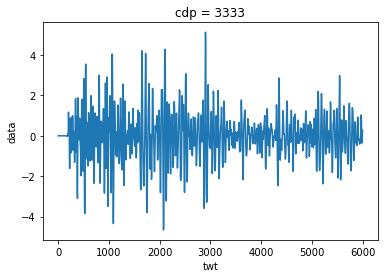

In [75]:
seisnc_vol.sel(cdp=3333).data.plot()

In [80]:
seisnc_vol.twt.max()
print(seisnc_vol.cdp.min(),seisnc_vol.cdp.max())

<xarray.DataArray 'cdp' ()>
array(0, dtype=int64) <xarray.DataArray 'cdp' ()>
array(36674, dtype=int64)


In [51]:
import rasterio
check = xr.open_rasterio(r'H:\McArthur\L210_Processed_Seismic_Package\17GA-SN1_Images_300dpi\stk_17GASN1_20s_300dpi.png')
check2 = rasterio.open(r'H:\McArthur\L210_Processed_Seismic_Package\17GA-SN1_Images_300dpi\stk_17GASN1_20s_300dpi.png')

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\gemgis9\lib\site-packages\rasterio\__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [52]:
tex = pv.numpy_to_texture(check2.read(1))

In [46]:
#tex = pv.numpy_to_texture(check.values.read(1))

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [84]:
check

<xarray.DataArray (band: 3, y: 10273, x: 48901)>
[1507079919 values with dtype=uint8]
Coordinates:
  * band     (band) int32 1 2 3
  * y        (y) float64 0.5 1.5 2.5 3.5 ... 1.027e+04 1.027e+04 1.027e+04
  * x        (x) float64 0.5 1.5 2.5 3.5 ... 4.89e+04 4.89e+04 4.89e+04 4.89e+04
Attributes:
    transform:   (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
    res:         (1.0, -1.0)
    is_tiled:    0
    nodatavals:  (nan, nan, nan)
    scales:      (1.0, 1.0, 1.0)
    offsets:     (0.0, 0.0, 0.0)

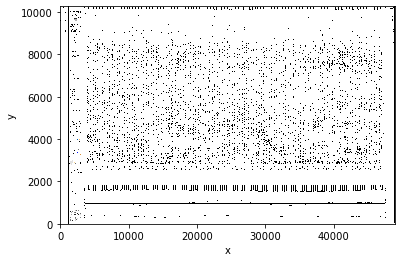

In [86]:
check.plot.imshow()

In [4]:
seisd = r'H:\McArthur\L210_Processed_Seismic_Package\17GA-SN1_SEGY_Data\psdm_17gasn1_18km.sgy'
scan = segy_header_scan(seisd, max_traces_scan=2000)
with pd.option_context("display.max_rows", 100):
    display(scan)

#seisnc_d = segy_loader(seisd)

  0%|          | 0.00/2.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,1.000500e+03,5.774946e+02,1.000000e+00,5.007500e+02,1000.5,1.500250e+03,2.000000e+03
TRACE_SEQUENCE_FILE,5,2000.0,1.000500e+03,5.774946e+02,1.000000e+00,5.007500e+02,1000.5,1.500250e+03,2.000000e+03
FieldRecord,9,2000.0,-9.999000e+03,0.000000e+00,-9.999000e+03,-9.999000e+03,-9999.0,-9.999000e+03,-9.999000e+03
TraceNumber,13,2000.0,-9.999000e+03,0.000000e+00,-9.999000e+03,-9.999000e+03,-9999.0,-9.999000e+03,-9.999000e+03
EnergySourcePoint,17,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00
CDP,21,2000.0,2.999500e+03,5.774946e+02,2.000000e+03,2.499750e+03,2999.5,3.499250e+03,3.999000e+03
CDP_TRACE,25,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00
TraceIdentificationCode,29,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00
NSummedTraces,31,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00
NStackedTraces,33,2000.0,1.474085e+02,3.325827e+01,3.000000e+00,1.520000e+02,156.0,1.620000e+02,1.820000e+02


In [5]:
_  = segy_loader(seisd, cdpx=181, cdpy=185, vert_domain="DEPTH")
print(_)

  0%|          | 0.00/36.7k [00:00<?, ? traces/s]

                               byte_loc    count          mean           std  \
TRACE_SEQUENCE_LINE                   1  36675.0  1.833800e+04  1.058730e+04   
TRACE_SEQUENCE_FILE                   5  36675.0  1.833800e+04  1.058730e+04   
CDP                                  21  36675.0  2.033700e+04  1.058730e+04   
NStackedTraces                       33  36675.0  1.519346e+02  1.413884e+01   
offset                               37  36675.0  2.164327e+01  2.147800e+01   
ReceiverGroupElevation               41  36675.0 -9.998928e+03  2.591405e-01   
SourceSurfaceElevation               45  36675.0 -9.998928e+03  2.591405e-01   
SourceWaterDepth                     61  36675.0 -2.032845e+02  4.019880e+03   
GroupWaterDepth                      65  36675.0 -9.758399e+01  4.040855e+03   
SourceX                              73  36675.0  7.054745e+05  9.105155e+04   
SourceY                              77  36675.0  7.922321e+06  3.138119e+04   
GroupX                               81 

Converting SEGY:   0%|          | 0.00/36.7k [00:00<?, ? traces/s]

<xarray.Dataset>
Dimensions:  (cdp: 36675, depth: 4501)
Coordinates:
  * cdp      (cdp) int64 0 1 2 3 4 5 6 ... 36669 36670 36671 36672 36673 36674
  * depth    (depth) float64 0.0 4.0 8.0 12.0 ... 1.799e+04 1.8e+04 1.8e+04
    cdp_x    (cdp) float32 8.722e+05 8.722e+05 8.722e+05 ... 5.645e+05 5.645e+05
    cdp_y    (cdp) float32 7.908e+06 7.908e+06 7.908e+06 ... 8.006e+06 8.006e+06
Data variables:
    data     (cdp, depth) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT:GEOSCIENCE AUSTRALIA  SURVEY NO:L210\nC02...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         psdm_17gasn1_18km.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-5.985400806568078, -4.457770195072733, -1.43355381...
    coord_scalar:        1.0


In [4]:
print(seisnc_d)

<xarray.Dataset>
Dimensions:  (cdp: 36675, twt: 4501)
Coordinates:
  * cdp      (cdp) int64 0 1 2 3 4 5 6 ... 36669 36670 36671 36672 36673 36674
  * twt      (twt) float64 0.0 4.0 8.0 12.0 ... 1.799e+04 1.8e+04 1.8e+04
Data variables:
    data     (cdp, twt) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT:GEOSCIENCE AUSTRALIA  SURVEY NO:L210\nC02...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         psdm_17gasn1_18km.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-5.985400806568078, -4.457770195072733, -1.43355381...
    coord_scalar:        1.0


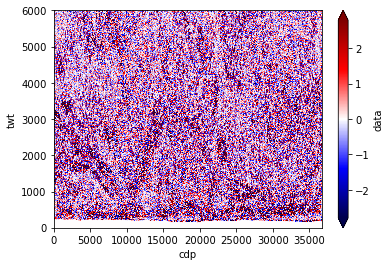

In [89]:
seisnc_vol.data.T.plot(robust="True",cmap="seismic")

AttributeError: 'QuadMesh' object has no attribute 'invert_yaxis'

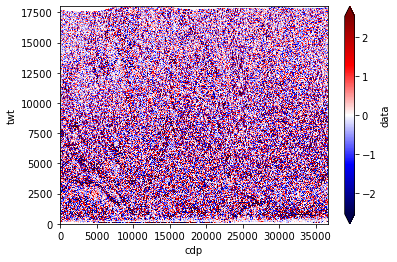

In [102]:
seisnc_d.data.T.plot(robust="True",cmap="seismic")

In [5]:
SN1 = pd.read_csv(r'K:\4 Data Province Scale\Australia\Northern Territory\Geophysics\L210_Processed_Seismic_Package\Supporting_Data\L210cdp_gda94_SN1_PPH.csv')

In [92]:
SN1.describe()

,CDP,CDP-X,CDP-Y,CDP-ELEV,GRAVITY,AIRMAG,CDP-AVG,CDP-STAT,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,36675.000000,36675.000000,3.667500e+04,36675.000000,36675.000000,36675.000000,36675.000000,36675.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,20337.000000,705474.494833,7.922321e+06,241.141132,-234.659223,-6.109693,-8.000654,10434.055842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10587.304898,91051.551607,3.138119e+04,15.907355,127.060699,57.523241,20.967644,5391.446816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.000000,564519.000000,7.895898e+06,190.000000,-530.000000,-131.000000,-55.000000,1002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,11168.500000,624996.500000,7.900170e+06,229.000000,-299.000000,-45.000000,-23.000000,5796.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20337.000000,695706.000000,7.904258e+06,240.000000,-221.000000,-5.000000,-6.000000,10446.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,29505.500000,785170.000000,7.941036e+06,257.000000,-154.000000,32.000000,7.000000,15107.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,38674.000000,872210.000000,8.006052e+06,266.000000,-16.000000,135.000000,32.000000,19725.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
xmin = SN1['CDP-X'].min()
ymin = SN1['CDP-Y'].min()
xmax = SN1['CDP-X'].max()
ymax = SN1['CDP-Y'].max()


height = ymax - ymin
width = xmax - xmin

print(xmin, xmax, ymin, ymax, height, width)

564519 872210 7895898 8006052 110154 307691


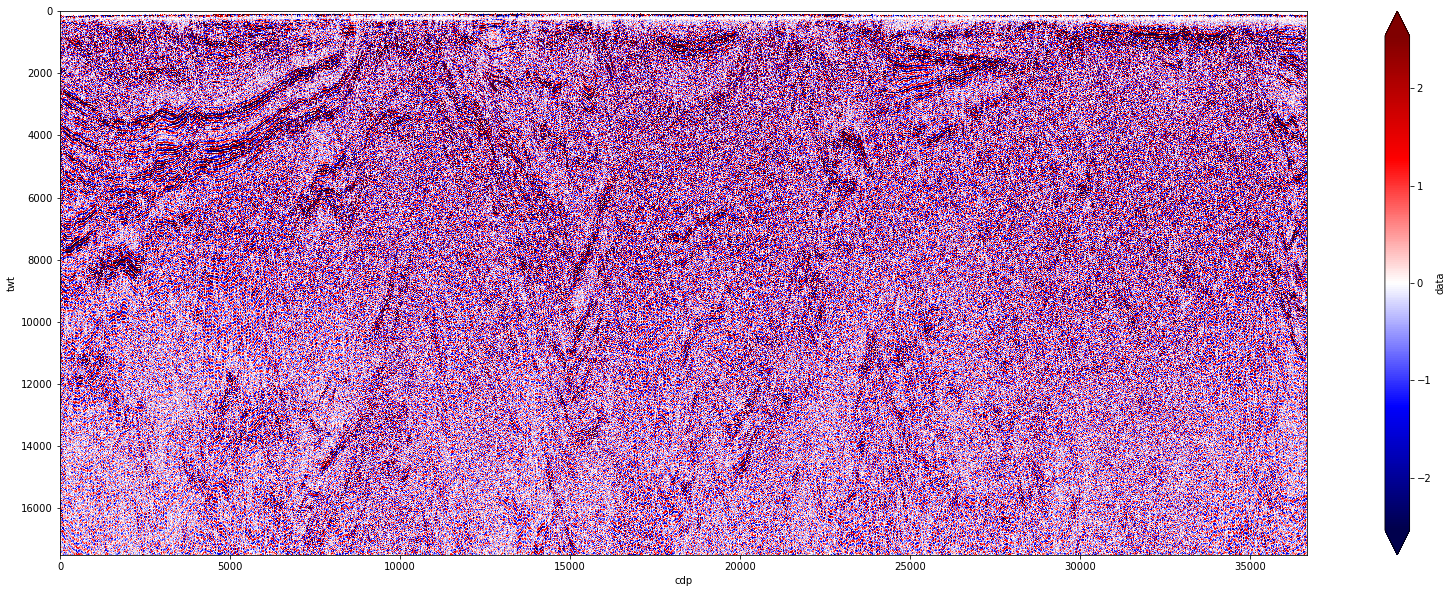

In [7]:
seisnc_d.data.T.plot(robust="True",cmap="seismic", aspect=width/height, size=10, ylim=(17500,0) )

In [9]:
import matplotlib.pyplot as plt
plt.show()
plt.savefig(r'H:\McArthur\test.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
east = SN1['CDP-X'].tolist()
north = SN1['CDP-Y'].tolist()
X = np.array([east, north]).T

n = len(X)
z0, z1 = -18000, 225

#duplicating the line, once with z=lower and another with z=upper values
vertices = np.zeros((2*n, 3))
vertices[:n, :2] = X
vertices[:n, 2] = z0
vertices[n:, :2] = X
vertices[n:, 2] = z1

faces = np.array([[3, i, i + 1, i + n] for i in range(n-1)] + [[3, i+n+1, i+n, i+1] for i in range(n-1)])

# L should be the normalized to 1 cumulative sum of the segment lengths
L = np.linalg.norm(X[1:] - X[:-1], axis=1).cumsum()
L /= L[-1]
UV = np.zeros((2*n, 2))
UV[1:n, 0] = L
UV[n+1:, 0] = L
UV[:, 1] = np.repeat([0, 1], n)


In [10]:
east = SN1['CDP-X'].tolist()
north = SN1['CDP-Y'].tolist()

In [11]:
X = np.array([east, north]).T

In [12]:
n = len(X)
z0, z1 = -18000, 225

In [13]:
#duplicating the line, once with z=lower and another with z=upper values
vertices = np.zeros((2*n, 3))
vertices[:n, :2] = X
vertices[:n, 2] = z0
vertices[n:, :2] = X
vertices[n:, 2] = z1

In [14]:
# i+n --- i+n+1
# |\      |
# | \     |
# |  \    |
# |   \   |
# i  --- i+1
#
faces = np.array([[3, i, i + 1, i + n] for i in range(n-1)] + [[3, i+n+1, i+n, i+1] for i in range(n-1)])

# L should be the normalized to 1 cumulative sum of the segment lengths
L = np.linalg.norm(X[1:] - X[:-1], axis=1).cumsum()
L /= L[-1]
UV = np.zeros((2*n, 2))
UV[1:n, 0] = L
UV[n+1:, 0] = L
UV[:, 1] = np.repeat([0, 1], n)



In [48]:
surface = pv.PolyData(vertices, faces)

In [28]:
surface.t_coords = UV

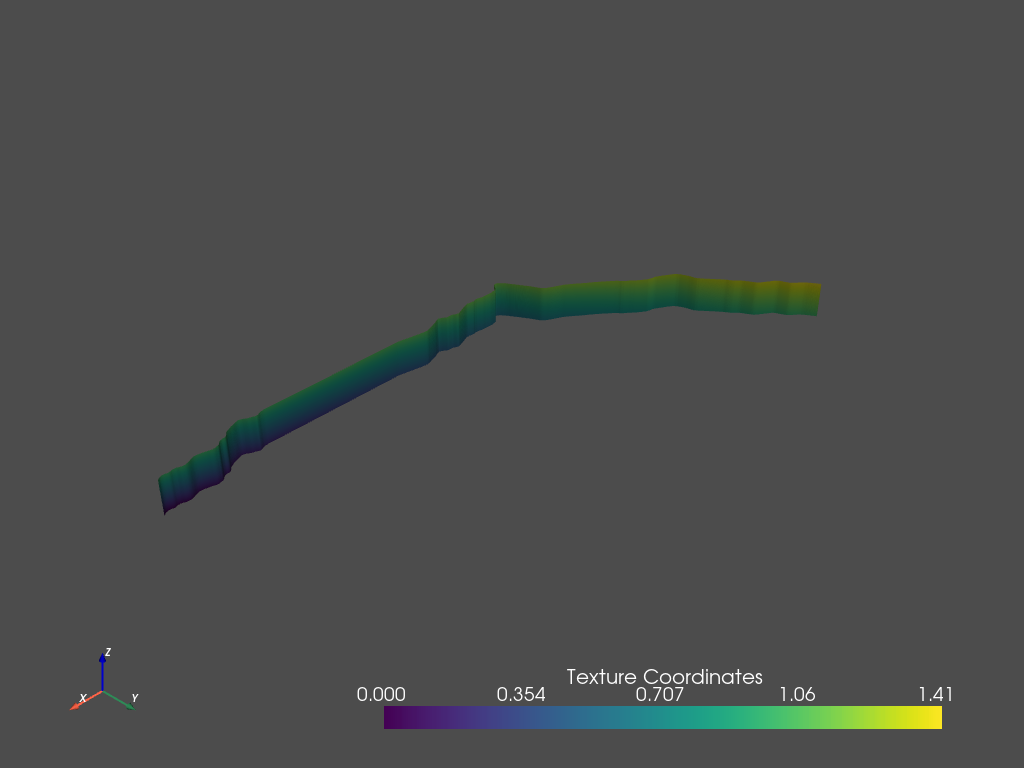

[(1083444.9472262554, 8316055.447226255, 356192.9472262554),
 (718364.5, 7950975.0, -8887.5),
 (0.0, 0.0, 1.0)]

In [29]:
surface.plot(notebook=True)

In [114]:
surface

PolyData (0x20406c5ed60)
  N Cells:	73348
  N Points:	73350
  X Bounds:	5.645e+05, 8.722e+05
  Y Bounds:	7.896e+06, 8.006e+06
  Z Bounds:	-1.800e+04, 2.250e+02
  N Arrays:	2

In [34]:
#texture = pv.Texture(r'K:\4 Data Province Scale\Australia\Northern Territory\Geophysics\L210_Processed_Seismic_Package\17GA-SN1_Images_300dpi\stk_17GASN1_20s_300dpi.png')
texture = pv.Texture(r'H:\McArthur\download.png')
#texture = pv.read_texture(r'H:\McArthur\download.png')

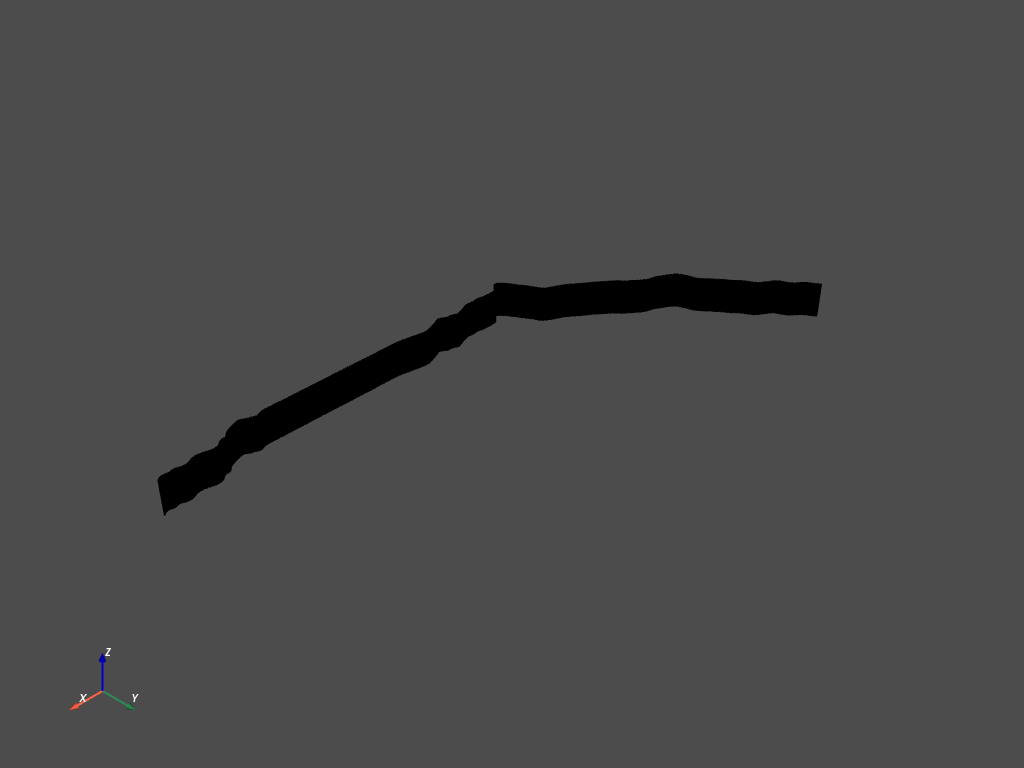

[(1083444.9472262554, 8316055.447226255, 356192.9472262554),
 (718364.5, 7950975.0, -8887.5),
 (0.0, 0.0, 1.0)]

In [47]:
surface.plot(texture=tex, notebook=True, show_edges=True)

In [117]:
#texture

(Texture)00000204077F2940

In [20]:
surface.t_coords.shape

(73350, 2)

In [21]:
X.shape

(36675, 2)

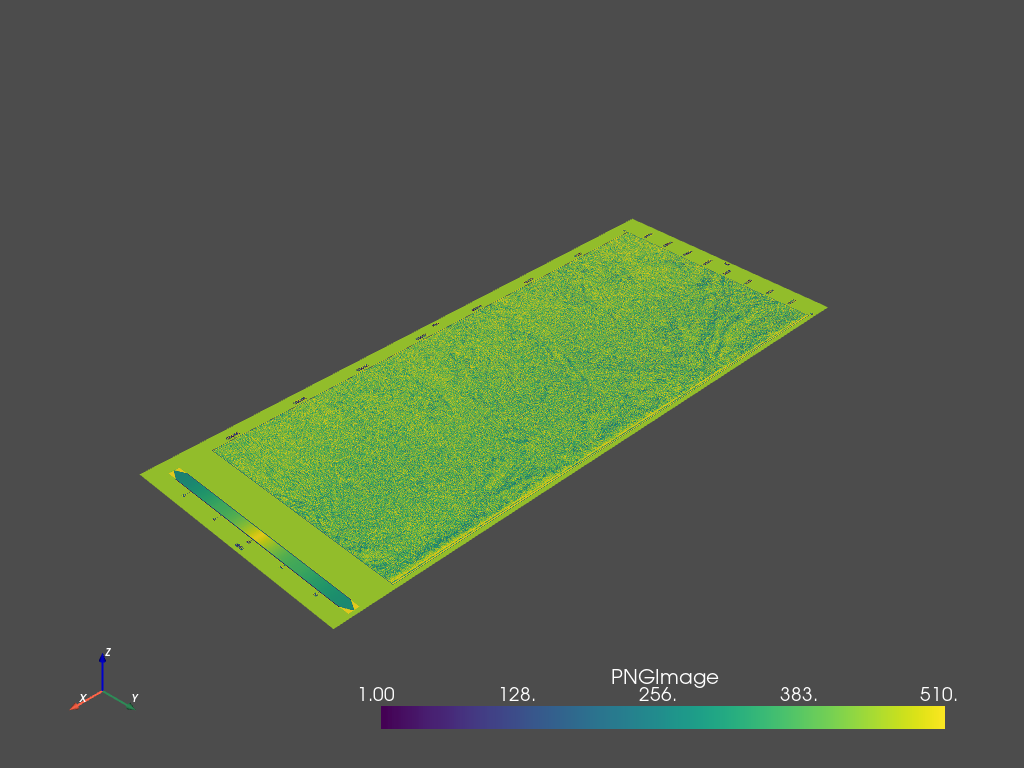

[(2473.395206291474, 2043.895206291474, 1747.895206291474),
 (725.5, 296.0, 0.0),
 (0.0, 0.0, 1.0)]

In [36]:
texture.plot()

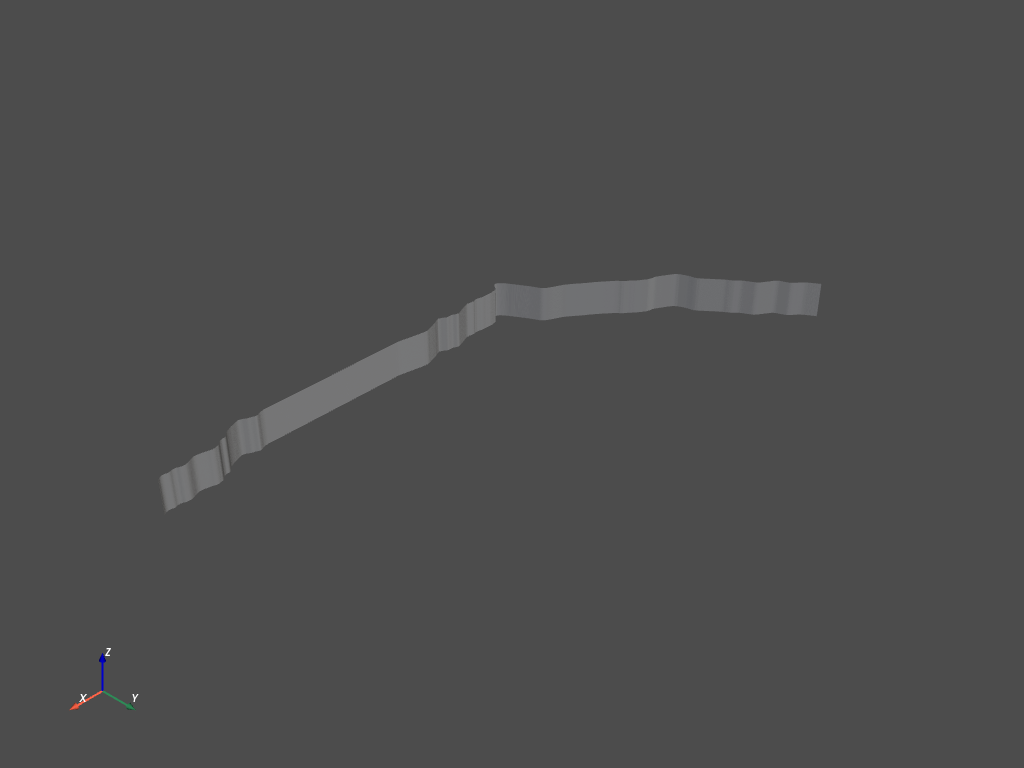

[(1083444.9472262554, 8316055.447226255, 356192.9472262554),
 (718364.5, 7950975.0, -8887.5),
 (0.0, 0.0, 1.0)]

In [49]:
surface.plot()

In [53]:
interpolated = surface.interpolate(seisnc_d.data.values)

TypeError: `target` must be a PyVista mesh type.

In [52]:
check.values.shape

(3, 10273, 48901)

In [61]:
seisnc_d

<xarray.Dataset>
Dimensions:  (cdp: 36675, twt: 4501)
Coordinates:
  * cdp      (cdp) int64 0 1 2 3 4 5 6 ... 36669 36670 36671 36672 36673 36674
  * twt      (twt) float64 0.0 4.0 8.0 12.0 ... 1.799e+04 1.8e+04 1.8e+04
Data variables:
    data     (cdp, twt) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT:GEOSCIENCE AUSTRALIA  SURVEY NO:L210\nC02...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         psdm_17gasn1_18km.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-5.985400806568078, -4.457770195072733, -1.43355381...
    coord_scalar:        1.0

In [71]:
seisnc_d_df = seisnc_d.to_dataframe()

In [72]:
seisnc_d_df

data
cdp   twt             
0     0.0      0.00000
      4.0      0.00000
      8.0      0.00000
      12.0     0.00000
      16.0     0.00000
...                ...
36674 17984.0  0.00023
      17988.0  0.00000
      17992.0  0.00000
      17996.0  0.00000
      18000.0  0.00000

[165074175 rows x 1 columns]

In [73]:
seisnc_d_df_reindex = seisnc_d_df.reset_index()
display(seisnc_d_df_reindex)

,cdp,twt,data
0,0,0.0,0.00000
1,0,4.0,0.00000
2,0,8.0,0.00000
3,0,12.0,0.00000
4,0,16.0,0.00000
...,...,...,...
165074170,36674,17984.0,0.00023
165074171,36674,17988.0,0.00000
165074172,36674,17992.0,0.00000
165074173,36674,17996.0,0.00000


In [74]:
seisnc_d_df_reindex.describe()

,cdp,twt,data
count,1.650742e+08,1.650742e+08,1.650742e+08
mean,1.833700e+04,9.000000e+03,2.584699e-04
std,1.058716e+04,5.197307e+03,1.296460e+00
min,0.000000e+00,0.000000e+00,-1.372893e+02
25%,9.168000e+03,4.500000e+03,-7.112643e-01
50%,1.833700e+04,9.000000e+03,0.000000e+00
75%,2.750600e+04,1.350000e+04,7.123660e-01
max,3.667400e+04,1.800000e+04,1.779853e+02


In [75]:
df2 = seisnc_d_df_reindex.merge(SN1, left_on='cdp', right_on='CDP')

In [76]:
df2.head()

,cdp,twt,data,LINE,CDP,CDP-X,CDP-Y,CDP-ELEV,GRAVITY,AIRMAG,CDP-AVG,CDP-STAT,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2000,0.0,0.0,cdp17GA-SN1,2000,872210,7908135,203,-256,55,32,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,4.0,0.0,cdp17GA-SN1,2000,872210,7908135,203,-256,55,32,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,8.0,0.0,cdp17GA-SN1,2000,872210,7908135,203,-256,55,32,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,12.0,0.0,cdp17GA-SN1,2000,872210,7908135,203,-256,55,32,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,16.0,0.0,cdp17GA-SN1,2000,872210,7908135,203,-256,55,32,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df2.shape

(156072175, 20)

In [96]:
df2['twtd'] = df2['twt'] * -1

In [97]:
pointsarray = df2[['CDP-X','CDP-Y','twtd'] ].to_numpy()

In [18]:
seisnc_d

<xarray.Dataset>
Dimensions:  (cdp: 36675, depth: 4501)
Coordinates:
  * cdp      (cdp) int64 0 1 2 3 4 5 6 ... 36669 36670 36671 36672 36673 36674
  * depth    (depth) float64 0.0 4.0 8.0 12.0 ... 1.799e+04 1.8e+04 1.8e+04
    cdp_x    (cdp) float32 8.722e+05 8.722e+05 8.722e+05 ... 5.645e+05 5.645e+05
    cdp_y    (cdp) float32 7.908e+06 7.908e+06 7.908e+06 ... 8.006e+06 8.006e+06
Data variables:
    data     (cdp, depth) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT:GEOSCIENCE AUSTRALIA  SURVEY NO:L210\nC02...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         psdm_17gasn1_18km.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-5.985400806568078, -4.457770195072733, -1.43355381...
    coord_scalar:        1.0

In [19]:
np.unique(seisnc_d.depth,return_counts=True)

(array([0.0000e+00, 4.0000e+00, 8.0000e+00, ..., 1.7992e+04, 1.7996e+04,
        1.8000e+04]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [23]:
#seisnc_d.depth.plot()
seisnc_d.depth.size

4501

In [98]:
point_cloud = pv.PolyData(pointsarray)
point_cloud["data"] = df2['data'].to_numpy()

In [99]:
point_cloud

PolyData (0x2613398e100)
  N Cells:	156072175
  N Points:	156072175
  X Bounds:	5.763e+05, 8.722e+05
  Y Bounds:	7.896e+06, 7.990e+06
  Z Bounds:	-1.800e+04, -0.000e+00
  N Arrays:	1

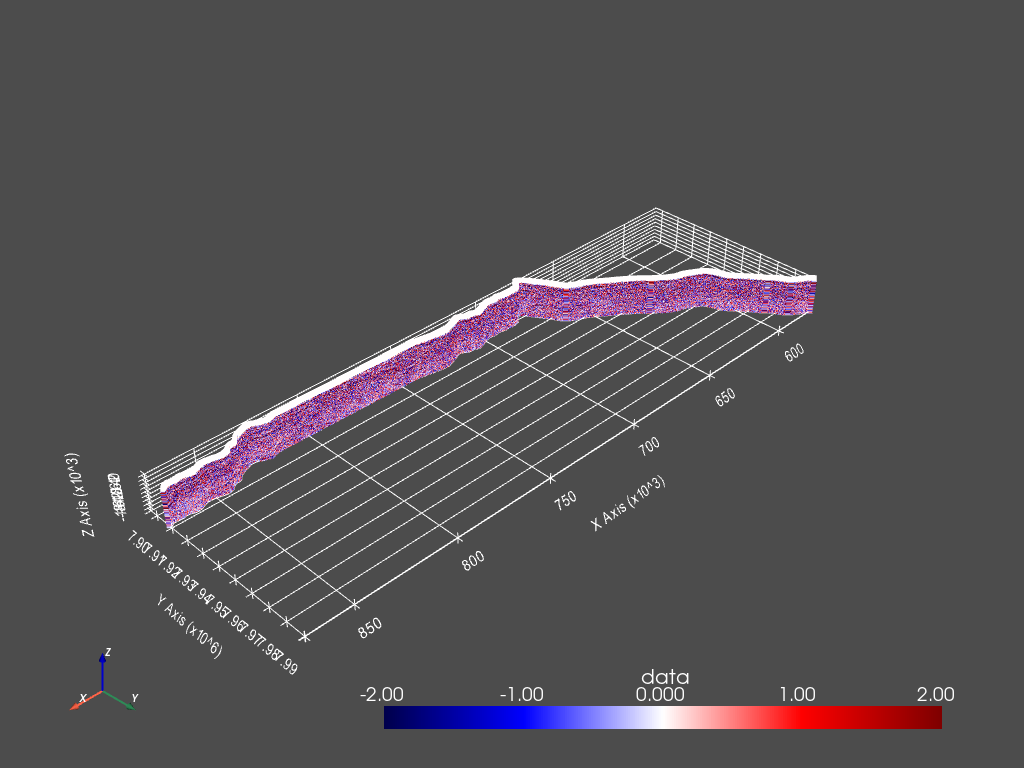

[(1071226.939979746, 8290024.439979746, 337947.43997974606),
 (724279.5, 7943077.0, -9000.0),
 (0.0, 0.0, 1.0)]

In [100]:
#point_cloud.points[:,2] = point_cloud.points[:,2]*-1
point_cloud.plot(cmap="seismic",clim=[-2,2],show_grid=True)

In [93]:
point_cloud.points[0:10]

pyvista_ndarray([[ 8.722100e+05,  7.908135e+06, -0.000000e+00],
                 [ 8.722100e+05,  7.908135e+06, -4.000000e+00],
                 [ 8.722100e+05,  7.908135e+06, -8.000000e+00],
                 [ 8.722100e+05,  7.908135e+06, -1.200000e+01],
                 [ 8.722100e+05,  7.908135e+06, -1.600000e+01],
                 [ 8.722100e+05,  7.908135e+06, -2.000000e+01],
                 [ 8.722100e+05,  7.908135e+06, -2.400000e+01],
                 [ 8.722100e+05,  7.908135e+06, -2.800000e+01],
                 [ 8.722100e+05,  7.908135e+06, -3.200000e+01],
                 [ 8.722100e+05,  7.908135e+06, -3.600000e+01]])

In [92]:
point_cloud.points[:,2]

pyvista_ndarray([-0.0000e+00, -4.0000e+00, -8.0000e+00, ..., -1.7992e+04,
                 -1.7996e+04, -1.8000e+04])

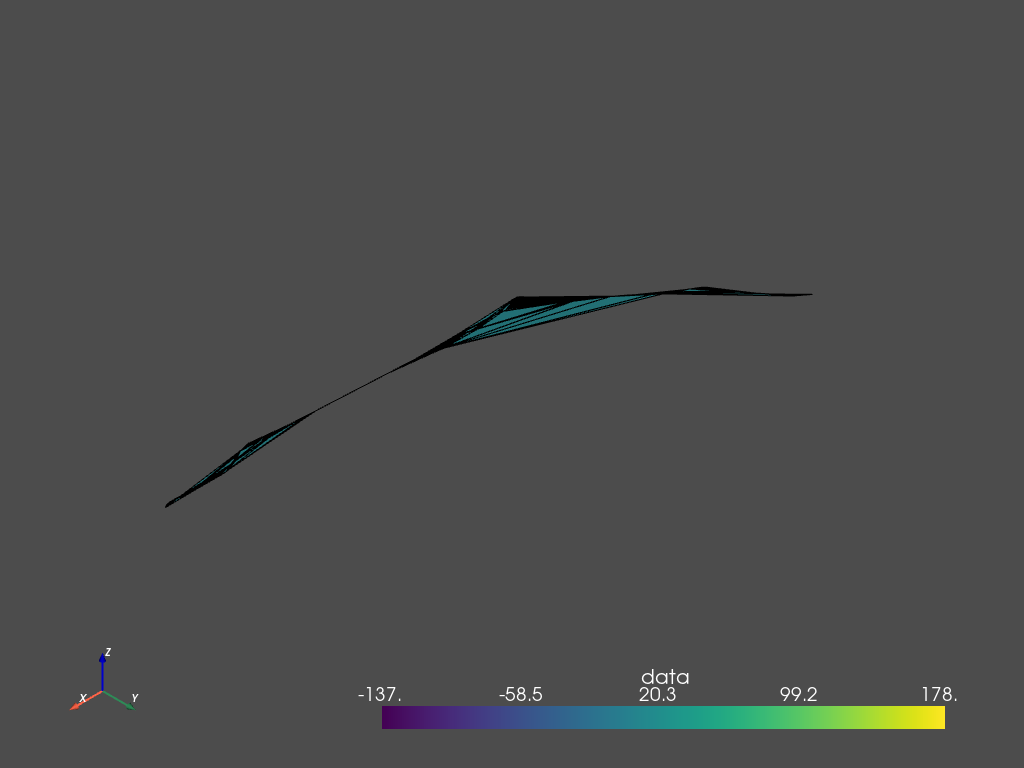

[(1070645.584686827, 8289443.084686827, 346366.0846868268),
 (724279.5, 7943077.0, 0.0),
 (0.0, 0.0, 1.0)]

In [101]:
surf = point_cloud.delaunay_2d()
surf.plot(show_edges=True)

In [102]:
surf

PolyData (0x26134d9e4c0)
  N Cells:	67826
  N Points:	156072175
  X Bounds:	5.763e+05, 8.722e+05
  Y Bounds:	7.896e+06, 7.990e+06
  Z Bounds:	-0.000e+00, -0.000e+00
  N Arrays:	1

In [103]:
point_cloud

PolyData (0x2613398e100)
  N Cells:	156072175
  N Points:	156072175
  X Bounds:	5.763e+05, 8.722e+05
  Y Bounds:	7.896e+06, 7.990e+06
  Z Bounds:	-1.800e+04, -0.000e+00
  N Arrays:	1

In [105]:
point_cloud.points

pyvista_ndarray([[ 8.722100e+05,  7.908135e+06, -0.000000e+00],
                 [ 8.722100e+05,  7.908135e+06, -4.000000e+00],
                 [ 8.722100e+05,  7.908135e+06, -8.000000e+00],
                 ...,
                 [ 5.763490e+05,  7.990256e+06, -1.799200e+04],
                 [ 5.763490e+05,  7.990256e+06, -1.799600e+04],
                 [ 5.763490e+05,  7.990256e+06, -1.800000e+04]])

In [114]:
#point_cloud.save(r"H:\McArthur\testSN1.stl")
#point_cloud.save_meshio(r"H:\McArthur\testSN1.stl")

AttributeError: 'PolyData' object has no attribute 'save_meshio'

In [108]:
!pip install pymeshlab

In [117]:
import pymeshlab
ms = pymeshlab.MeshSet()

ms.load_new_mesh(r"H:\McArthur\testSN12.PLY")


In [118]:
ms.save_current_mesh(r"H:\McArthur\testSN1.STL")

In [115]:
ms

In [116]:
ms.plot()

AttributeError: 'pymeshlab.pmeshlab.MeshSet' object has no attribute 'plot'

In [ ]:
#surf3 = point_cloud.delaunay_3d()


In [5]:
#filename = 
mesh = pv.read(r"H:\McArthur\testSN12.ply")

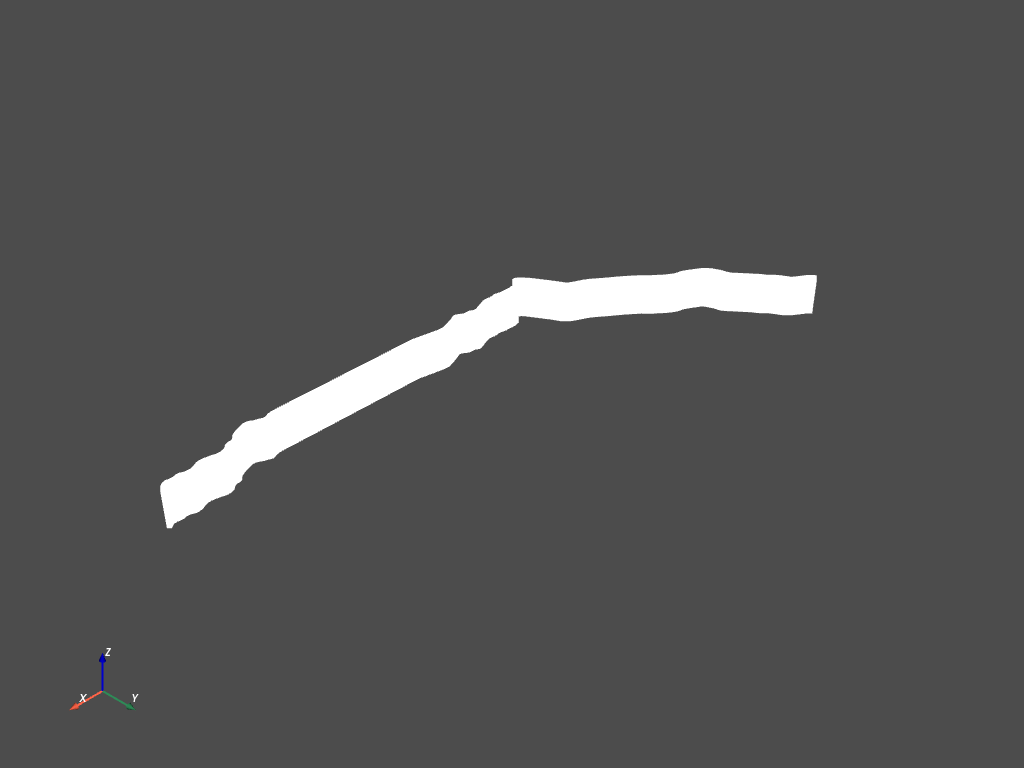

[(1071226.939979746, 8290024.439979746, 337947.43997974606),
 (724279.5, 7943077.0, -9000.0),
 (0.0, 0.0, 1.0)]

In [7]:
mesh.plot(cmap="viridis")

In [8]:
mesh

PolyData,Information
N Cells,156072175
N Points,156072175
X Bounds,"5.763e+05, 8.722e+05"
Y Bounds,"7.896e+06, 7.990e+06"
Z Bounds,"-1.800e+04, -0.000e+00"
N Arrays,0


In [24]:
seisnc_d

<xarray.Dataset>
Dimensions:  (cdp: 36675, depth: 4501)
Coordinates:
  * cdp      (cdp) int64 0 1 2 3 4 5 6 ... 36669 36670 36671 36672 36673 36674
  * depth    (depth) float64 0.0 4.0 8.0 12.0 ... 1.799e+04 1.8e+04 1.8e+04
    cdp_x    (cdp) float32 8.722e+05 8.722e+05 8.722e+05 ... 5.645e+05 5.645e+05
    cdp_y    (cdp) float32 7.908e+06 7.908e+06 7.908e+06 ... 8.006e+06 8.006e+06
Data variables:
    data     (cdp, depth) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT:GEOSCIENCE AUSTRALIA  SURVEY NO:L210\nC02...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         psdm_17gasn1_18km.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-5.985400806568078, -4.457770195072733, -1.43355381...
    coord_scalar:        1.0

In [28]:
seisnc_d['cdp_x']

<xarray.DataArray 'cdp_x' (cdp: 36675)>
array([872210., 872203., 872196., ..., 564528., 564524., 564519.],
      dtype=float32)
Coordinates:
  * cdp      (cdp) int64 0 1 2 3 4 5 6 ... 36669 36670 36671 36672 36673 36674
    cdp_x    (cdp) float32 8.722e+05 8.722e+05 8.722e+05 ... 5.645e+05 5.645e+05
    cdp_y    (cdp) float32 7.908e+06 7.908e+06 7.908e+06 ... 8.006e+06 8.006e+06

In [27]:
depthlist = []
#for i in range(0,4501):
    #depthlist.append(i*4)
    
    
for i in range(0,4501):
    #depthlist.append(i*9000)
    depthlist.append(i*4)
    
print(depthlist)    
    


[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400, 404, 408, 412, 416, 420, 424, 428, 432, 436, 440, 444, 448, 452, 456, 460, 464, 468, 472, 476, 480, 484, 488, 492, 496, 500, 504, 508, 512, 516, 520, 524, 528, 532, 536, 540, 544, 548, 552, 556, 560, 564, 568, 572, 576, 580, 584, 588, 592, 596, 600, 604, 608, 612, 616, 620, 624, 628, 632, 636, 640, 644, 648, 652, 656, 660, 664, 668, 672, 676, 680, 684, 688, 692, 696, 700, 704, 708, 712, 716, 720, 724, 728, 732, 736, 740, 744, 748, 752, 756, 760, 764, 768, 772, 776, 780, 784, 788, 792, 796, 800, 804, 808, 812, 816, 82

In [59]:
len(depthlist)

4501

In [28]:

#vertices[:n, :2] = X
#vertices[:n, 2] = z0
#vertices[n:, :2] = X
#vertices[n:, 2] = z1

verticesZ = np.zeros((len(depthlist)*n, 3))
for i, depth in enumerate(reversed(depthlist)):
    verticesZ[n*i:n+n*i, :2] = X
    verticesZ[n*i:n+n*i, 2] = depth * -1
    


In [12]:
verticesZ[n*2]

array([ 872210., 7908135.,       0.])

In [29]:
facelist = [[3, i, i + 1, i + n] for i in range(n-1)]

for index, depth in enumerate(reversed(depthlist)):
    if index == 0:
        continue
    
    nf = [[3, i+n*index+1, i+n*index, i+1] for i in range(n-1)]
    facelist = facelist + nf
    
facesZ = np.array(facelist)      
    

In [13]:
#faces = np.array([[3, i, i + 1, i + n] for i in range(n-1)] + [[3, i+n+1, i+n, i+1] for i in range(n-1)])

faces3 = np.array([[3, i, i + 1, i + n] for i in range(n-1)] + [[3, i+n+1, i+n, i+1] for i in range(n-1)]\
                 + [[3, i+n*2+1, i+n*2, i+1] for i in range(n-1)])

facelist = []
for index, depth in enumerate(reversed(depthlist)):
    nf = [[3, i, i + 1, i + n] for i in range(n-1)] 
    #nf = [[3, i+index,  i + 1+index, i + n+index] for i in range(n-1)]  + [[3, i+n+1 + index, i+n + index, i+1 + index] for i in range(n-1)]
    #nf = [[3, i+n+1 + index, i+n + index, i+1 + index] for i in range(n-1)]
    #nf = [[3, i+n+1, i+n, i+1] for i in range(n-1)]
    #nf = [[3, i+n+n*index+1, i+n+n*index, i+1] for i in range(n-1)]
    facelist = facelist + nf
    
facesZ = np.array(facelist)    
    

In [15]:
surf3

PolyData,Information
N Cells,110022
N Points,110025
X Bounds,"5.645e+05, 8.722e+05"
Y Bounds,"7.896e+06, 8.006e+06"
Z Bounds,"-1.800e+04, 0.000e+00"
N Arrays,0


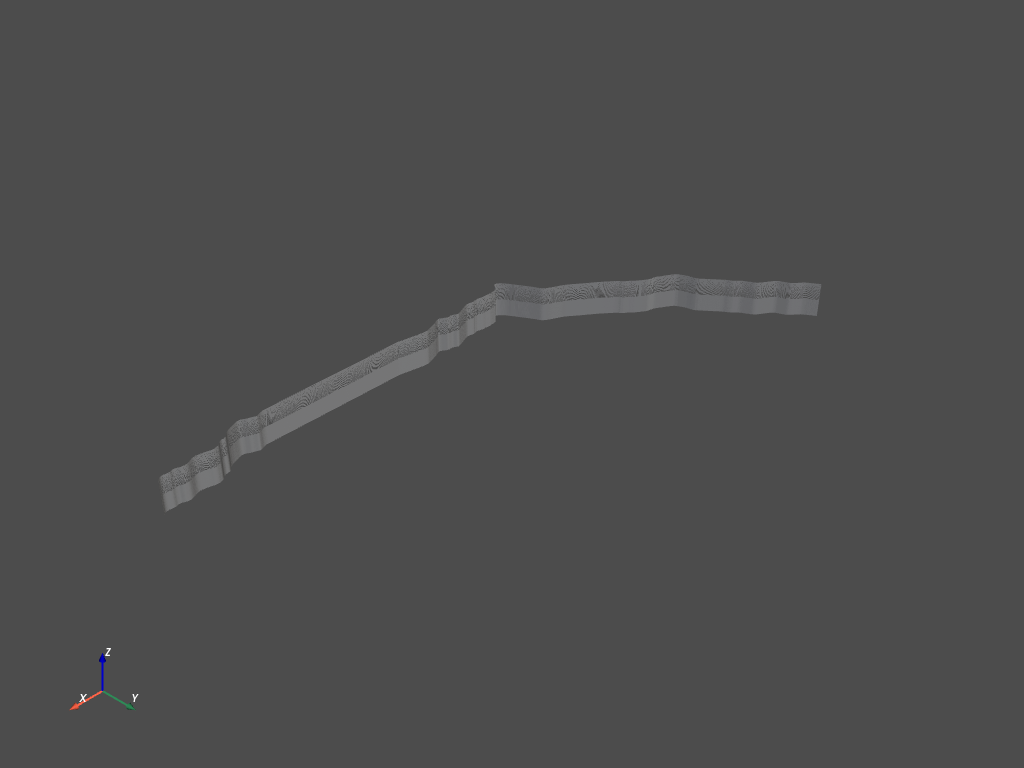

[(1083431.0602754995, 8316041.5602755, 356066.5602754994),
 (718364.5, 7950975.0, -9000.0),
 (0.0, 0.0, 1.0)]

In [14]:
surf3 = pv.PolyData(verticesZ, faces3)
surf3.plot()

In [16]:
surf3.plot(notebook=False)

[(718365.7945184512, 7950975.724258571, -8999.94636268863),
 (718364.5, 7950975.0, -9000.0),
 (0.041011123003351704, -0.14649830354460566, 0.9883604276014681)]

In [147]:
print(faces.shape)
print(facesZ.shape)

(73348, 4)
(183370, 4)


In [21]:
print(vertices[0],vertices[-1])
print(verticesZ[0],verticesZ[-1])

print(faces[0],faces[-1])
#print(facesZ[0],facesZ[-1])
print(faces3[0],faces3[-1])

[ 872210. 7908135.  -18000.] [ 564519. 8006052.       0.]
[ 872210. 7908135.  -18000.] [ 564519. 8006052.       0.]
[    3     0     1 36675] [    3 73349 73348 36674]
[    3     0     1 36675] [     3 110024 110023  36674]


In [128]:
print(len(vertices))
print(len(verticesZ))
print(len(verticesZ)/len(depthlist))

73350
183375
36675.0


In [73]:
print (faces[0])
print (faces[1])
print (faces[2])
print (faces[3])
print (faces[4])
print (faces[int(73348/2)-1])
print (faces[int(73348/2)])
print (faces[int(73348/2) + 1])
print (faces[int(73348/2)-2])
print (faces[int(73348/2)-1])
print (faces[int(73348/2)])
print (faces[int(73348/2) + 1])

[    3     0     1 36675]
[    3     1     2 36676]
[    3     2     3 36677]
[    3     3     4 36678]
[    3     4     5 36679]
[    3 36673 36674 73348]
[    3 36676 36675     1]
[    3 36677 36676     2]
[    3 36672 36673 73347]
[    3 36673 36674 73348]
[    3 36676 36675     1]
[    3 36677 36676     2]


In [30]:
surfZ = pv.PolyData(verticesZ,facesZ)

In [31]:
surfZ

PolyData,Information
N Cells,165069674
N Points,165074175
X Bounds,"5.645e+05, 8.722e+05"
Y Bounds,"7.896e+06, 8.006e+06"
Z Bounds,"-1.800e+04, 0.000e+00"
N Arrays,0


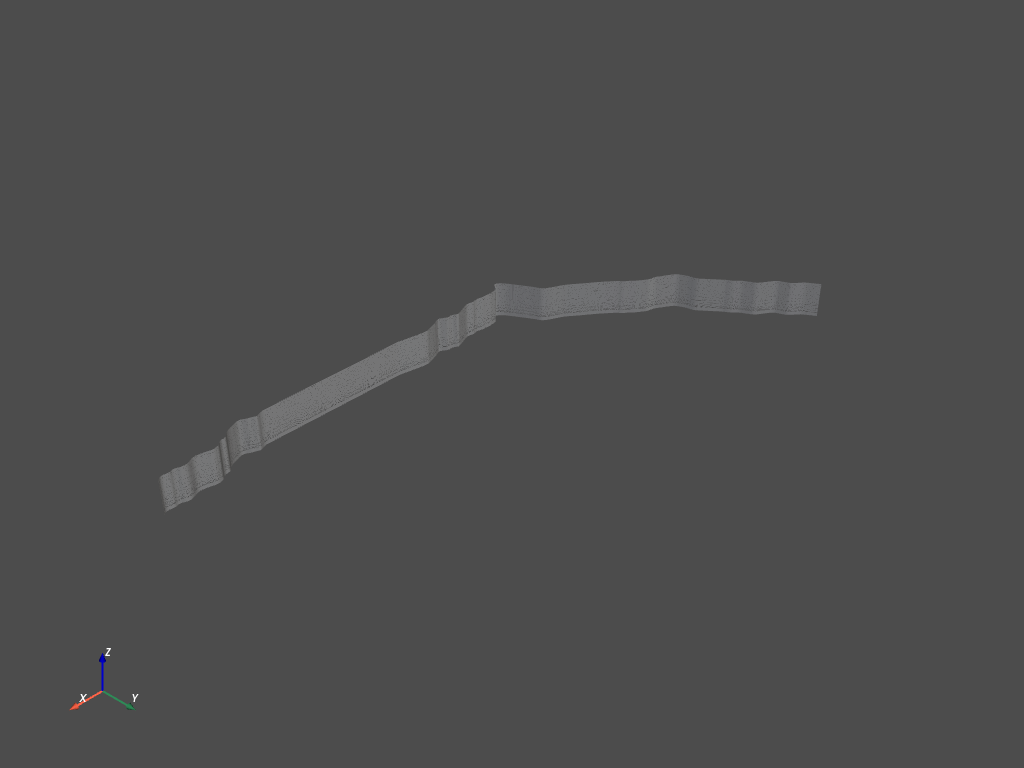

[(1083431.0602754995, 8316041.5602755, 356066.5602754994),
 (718364.5, 7950975.0, -9000.0),
 (0.0, 0.0, 1.0)]

In [26]:
surfZ.plot()

In [7]:
seisnc_d = _
east = seisnc_d['cdp_x'].values.tolist()
north = seisnc_d['cdp_y'].values.tolist()
X = np.array([east, north]).T

n = len(X)
z0, z1 = -18000, 0

##make a bunch of vertices in a list

#duplicating the line, once with z=lower and another with z=upper values
vertices = np.zeros((2*n, 3))
vertices[:n, :2] = X
vertices[:n, 2] = z0
vertices[n:, :2] = X
vertices[n:, 2] = z1

faces = np.array([[3, i, i + 1, i + n] for i in range(n-1)] + [[3, i+n+1, i+n, i+1] for i in range(n-1)])

# L should be the normalized to 1 cumulative sum of the segment lengths
L = np.linalg.norm(X[1:] - X[:-1], axis=1).cumsum()
L /= L[-1]
UV = np.zeros((2*n, 2))
UV[1:n, 0] = L
UV[n+1:, 0] = L
UV[:, 1] = np.repeat([0, 1], n)


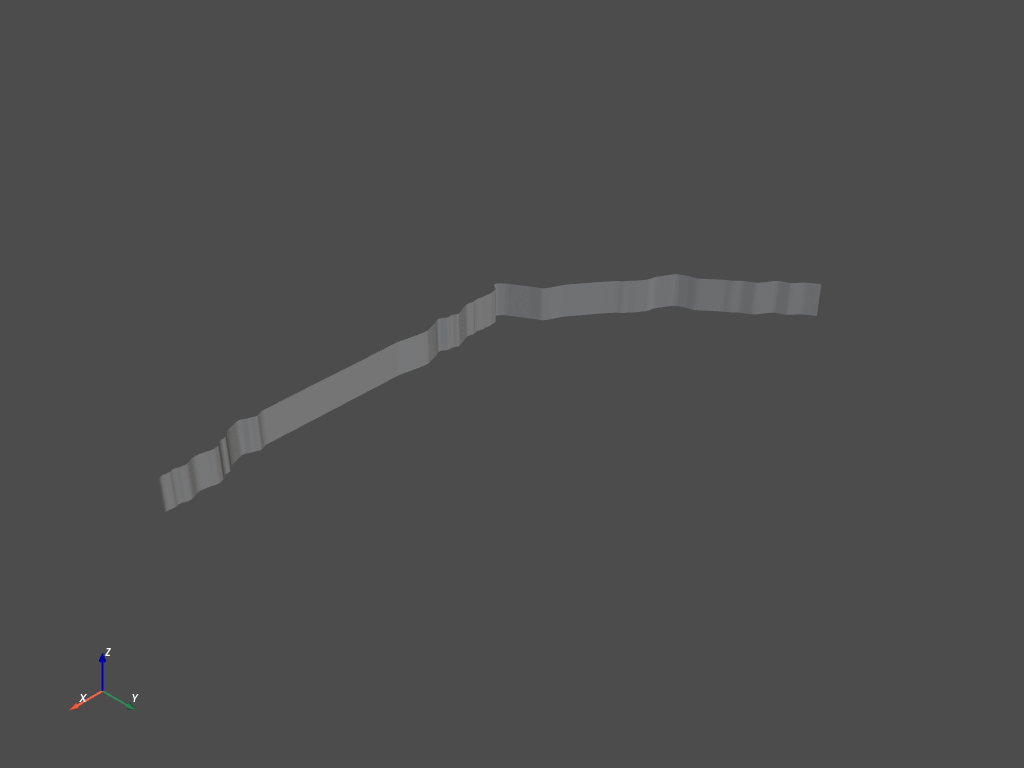

[(1083431.0602754995, 8316041.5602755, 356066.5602754994),
 (718364.5, 7950975.0, -9000.0),
 (0.0, 0.0, 1.0)]

In [8]:
surf2 = pv.PolyData(vertices, faces)
surf2.plot()

In [32]:
surf2

PolyData,Information
N Cells,73348
N Points,73350
X Bounds,"5.645e+05, 8.722e+05"
Y Bounds,"7.896e+06, 8.006e+06"
Z Bounds,"-1.800e+04, 0.000e+00"
N Arrays,0


In [37]:
surf2.points[1]

pyvista_ndarray([ 872203., 7908127.,  -18000.])

In [44]:
surf2.faces[257]

64

In [48]:
faces[0:50]

array([[    3,     0,     1, 36675],
       [    3,     1,     2, 36676],
       [    3,     2,     3, 36677],
       [    3,     3,     4, 36678],
       [    3,     4,     5, 36679],
       [    3,     5,     6, 36680],
       [    3,     6,     7, 36681],
       [    3,     7,     8, 36682],
       [    3,     8,     9, 36683],
       [    3,     9,    10, 36684],
       [    3,    10,    11, 36685],
       [    3,    11,    12, 36686],
       [    3,    12,    13, 36687],
       [    3,    13,    14, 36688],
       [    3,    14,    15, 36689],
       [    3,    15,    16, 36690],
       [    3,    16,    17, 36691],
       [    3,    17,    18, 36692],
       [    3,    18,    19, 36693],
       [    3,    19,    20, 36694],
       [    3,    20,    21, 36695],
       [    3,    21,    22, 36696],
       [    3,    22,    23, 36697],
       [    3,    23,    24, 36698],
       [    3,    24,    25, 36699],
       [    3,    25,    26, 36700],
       [    3,    26,    27, 36701],
 

In [49]:
len(faces)

73348

In [33]:
seisnc_d.data.shape

(36675, 4501)

In [36]:
test2 = seisnc_d.data.values.ravel()

In [37]:
test2.shape

(165074175,)

In [38]:
surfZ.save(r'H:\McArthur\surfz.stl')

In [39]:
surfZ['data'] = test2

In [44]:
surfZ.plot(cmap="seismic",clim=[-2,2],show_grid=True, cpos=(1,2,1), notebook=False)

[(881513.5585173427, 7979972.193161912, 7323.590190353454),
 (718364.5, 7950975.0, -9000.0),
 (-0.13037227326080947, 0.1852162875109378, 0.9740112921344775)]

In [45]:
surf2

PolyData,Information
N Cells,73348
N Points,73350
X Bounds,"5.645e+05, 8.722e+05"
Y Bounds,"7.896e+06, 8.006e+06"
Z Bounds,"-1.800e+04, 0.000e+00"
N Arrays,0


In [57]:
texture1 = pv.Texture(r'c:\users\rscott\Pictures\SN1.PNG')
tex18 = pv.Texture(r'H:\McArthur\L210_Processed_Seismic_Package\17GA-SN1_Images_300dpi\psdm_17GASN1_18km_300dpi.png')

In [48]:
surf2.texture_map_to_plane(inplace=True)

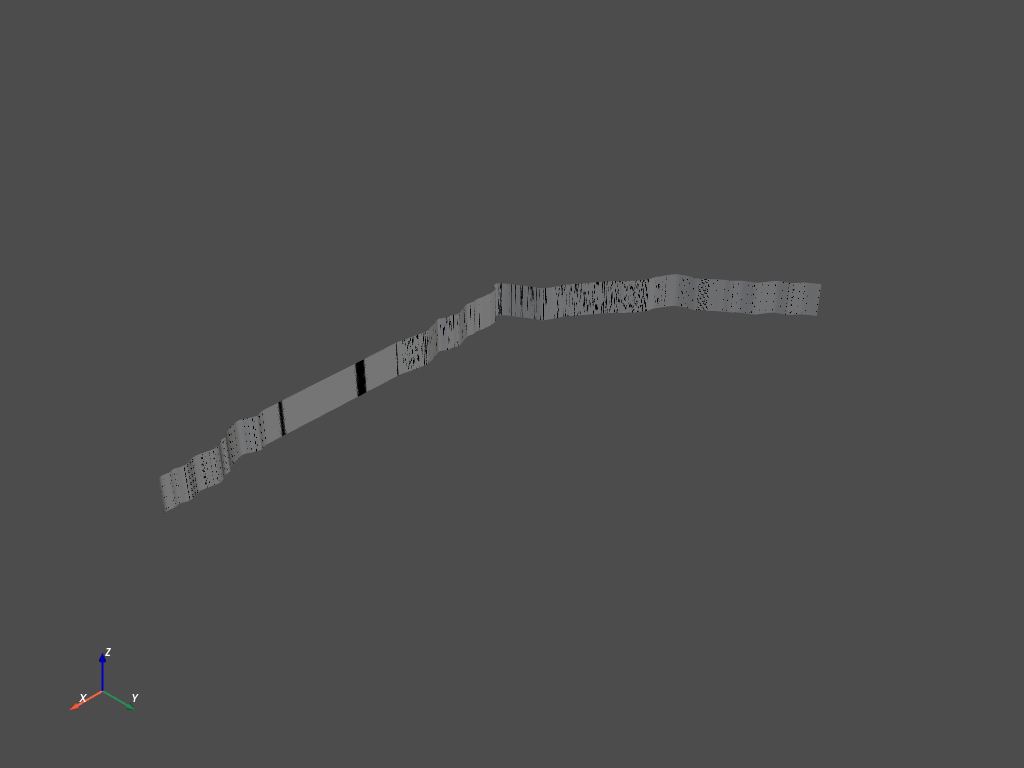

[(1083431.0602754995, 8316041.5602755, 356066.5602754994),
 (718364.5, 7950975.0, -9000.0),
 (0.0, 0.0, 1.0)]

In [58]:
surf2.plot(texture=tex18, notebook=True, show_edges=False)

In [65]:
#surf2.save(r'H:\McArthur\badtexture.ply')
surf2.save(r'H:\McArthur\badtexture.stl')

In [61]:
sjunk = pv.read(r'H:\McArthur\badtexture.ply')

In [62]:
sjunk

PolyData (0x22957314340)
  N Cells:	73348
  N Points:	73350
  X Bounds:	5.645e+05, 8.722e+05
  Y Bounds:	7.896e+06, 8.006e+06
  Z Bounds:	-1.800e+04, 0.000e+00
  N Arrays:	1

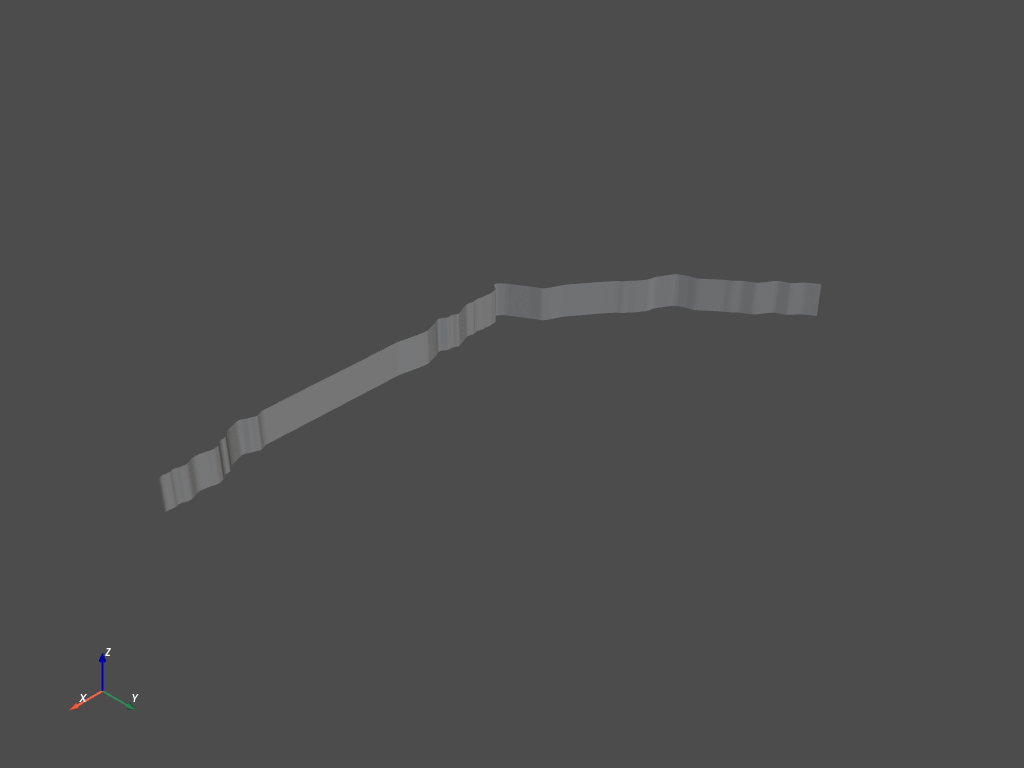

[(1083431.0602754995, 8316041.5602755, 356066.5602754994),
 (718364.5, 7950975.0, -9000.0),
 (0.0, 0.0, 1.0)]

In [64]:
sjunk.plot()